# Support Vector Machine Classifier

In this notebook, we will implement SVM Classifier from scratch. For theoritical aspects please consider:


1.   https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
2.   https://www.python-engineer.com/courses/mlfromscratch/07_svm/
3. https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2


**Import libraries**

In [1]:
#We are importing all necessary libraries to implement our model
import matplotlib.pyplot as plt
# this line tells the notebook to show plots "inline"
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**SVM Scratch Implementation**

In [2]:
class SVM:
    
    def __init__(self, alpha=0.001,iterations=1000): # constructor function to intialize learning rate alpha, lambda param and number of iterations
        self.alpha = alpha
        self.iterations = iterations
        # self.lambda_param = lambda_param (if in future user wants to give some well defined lambda param say for example : lambda_param=0.01 , currently taking as 1/epoch)
        
    def transformMultiClass(self,y,c): # utility function to convert given mutilclass vector to 2 class 0/1 vector
        # Reference : https://stackoverflow.com/questions/56594598/change-1s-to-0-and-0s-to-1-in-numpy-array-without-looping/56594688
        y_copy = y.copy()
        indices_C = y==c            # all indices with class 'c'
        indices_notC = y!=c         # all indices with classes other than 'c'
        y_copy[indices_C]=1         # convert values to 1 for all class 'c'
        y_copy[indices_notC]=-1     # convert values to 0 for all class other than 'c'
        return y_copy

    def compute_cost(self,W, X, Y):
        # Reference : https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2
        # calculate hinge loss - SVM uses hinge loss function
        N = X.shape[0]
        distances = 1 - Y * (np.dot(X, W))
        distances[distances < 0] = 0  # equivalent to max(0, distance)
        hinge_loss = 10000 * (np.sum(distances) / N) # 10000 is regularization parameter (fixed for now)
        # calculate cost
        cost = 1 / 2 * np.dot(W, W) + hinge_loss
        return cost


    def fit(self,X,y):
        n_samples, n_features = X.shape
        self.costs = []
        self.weights = []
        classes = set(y)               # storing unique classes (our predicted output will be one of them)
        # Using concept of one-vs-all where a particular class is treated as 1 and all other 0 and this process is repeated for all classes
        for c in classes:
            # weight updation for class 'c'
            y_onevall = self.transformMultiClass(y,c)
            weight = np.zeros(n_features) # initializing weights with 0 at beginning of SVM Classifier
            bias = 0                      # initailizing bias as 0 at beginning of SVM Classifier
            cost = list()
            for itr in range(self.iterations):
                for idx, x_i in enumerate(X): # iterating through full dataset
                    lambda_param=1/(itr+1)    # regularization param ( will decrease with iteration)
                    condition = y_onevall[idx] * (np.dot(x_i, weight) - bias) >= 1 # standard condition of SVM Classifier
                    if condition:
                        weight = weight - self.alpha * (2 * lambda_param * weight) # gradient update when no misclassification
                    else:
                        weight = weight - self.alpha * (2 * lambda_param * weight - np.dot(x_i, y_onevall[idx])) # gradient update when misclassification
                        bias = bias - self.alpha * y_onevall[idx]
                        
                cst=self.compute_cost(weight,X,y_onevall)
                cost.append(cst)
            self.weights.append((weight,bias,c))
            self.costs.append((cost,c))
        return self
    
    def predict(self,X):
        X_prediction = list() # storing predicted classes
        for x in X:
            class_predictions = [(np.dot(x, weight) - bias ,c) for weight,bias,c in self.weights] # This loop runs n times for n classes (multi class logistic regression one vs all)
            X_prediction.append(max(class_predictions)[1])
        return X_prediction

    def score(self,X,y): # function to calculate numner of matches between actual classes and predicted classes by our model
        size = len(y)        
        return sum(self.predict(X)==y)/size # number of matches divided by total inputs
    
    def plotCost(self,costs): # utility function to plot cost value per class
         for cost,c in costs   :
                scaledCost = [ c/10000 for c in cost ] # Dividing by 10000 for scaled output
                plt.plot(range(len(cost)),scaledCost,'blue')
                plt.title(" Cost Function for type " + str(c) +" vs All")
                plt.xlabel("Iterations")
                plt.ylabel("Cost")
                plt.show()

**Import Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# importing dataset using pandas   
filename = 'drive/My Drive/datasets/beer.txt'
header_list = ['caloric_value','nitrogen','turbidity','style','alcohol','sugars','biterness','beer_id','colour','degree_of_fermentation']
data = pd.read_csv(filename,sep='\t', header=None,dtype=str,names=header_list)
data.dtypes

caloric_value             object
nitrogen                  object
turbidity                 object
style                     object
alcohol                   object
sugars                    object
biterness                 object
beer_id                   object
colour                    object
degree_of_fermentation    object
dtype: object

In [6]:
# creating dependent and independent features
y = data['style'].values
X = data.drop(['style','beer_id'],axis=1).values

In [7]:
# data stardaization pre-processing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Model Generation/Testing

In [8]:
scores=list()
print("SVM Classifier Learning")
for i in range(10):
    X_train,X_test,y_train,y_test  = train_test_split(X, y, train_size = 2/3, shuffle = True)
    model = SVM(alpha=0.001,iterations=1000)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score = model.score(X_test,y_test)
    print("Accuracy ",i," = ",score)
    scores.append(score)

SVM Classifier Learning
Accuracy  0  =  0.9807692307692307
Accuracy  1  =  0.8846153846153846
Accuracy  2  =  0.9230769230769231
Accuracy  3  =  0.9615384615384616
Accuracy  4  =  0.9423076923076923
Accuracy  5  =  0.9615384615384616
Accuracy  6  =  0.9615384615384616
Accuracy  7  =  0.9807692307692307
Accuracy  8  =  0.9615384615384616
Accuracy  9  =  0.9807692307692307


In [9]:
print("Mean accuracy for SVM Classifier = ",np.mean(scores))

Mean accuracy for SVM Classifier =  0.9538461538461537


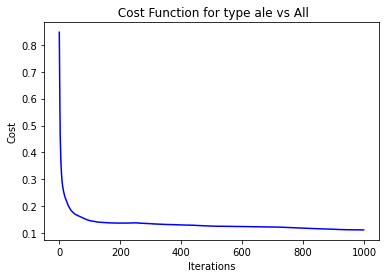

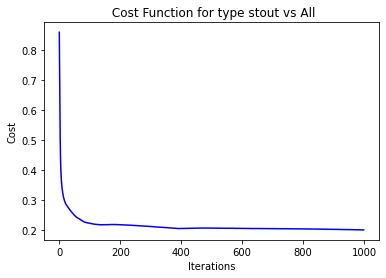

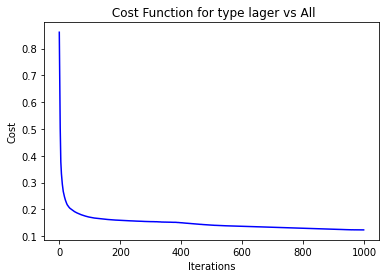

In [10]:
model.plotCost(model.costs)